In [43]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
dataFrame = pd.read_csv("FakeNewsNet.csv")

In [45]:
dataFrame.head(10)

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
5,Gwen Stefani Got Dumped by Blake Shelton Over ...,www.intouchweekly.com/posts/gwen-stefani-dumpe...,www.intouchweekly.com,45,0
6,Broward County Sheriff Fired For Lying About P...,https://yournewswire.com/broward-county-sherif...,yournewswire.com,124,0
7,Amber Rose Shuts Down French Montana Dating Ru...,www.etonline.com/news/214798_amber_rose_shuts_...,www.etonline.com,4,0
8,Mindy Kaling makes first post-baby appearance ...,https://www.aol.com/article/entertainment/2018...,www.aol.com,59,1
9,Katharine McPhee Butchers Tony Nominations: “I...,https://www.98online.com/2018/05/02/katharine-...,www.98online.com,10,1


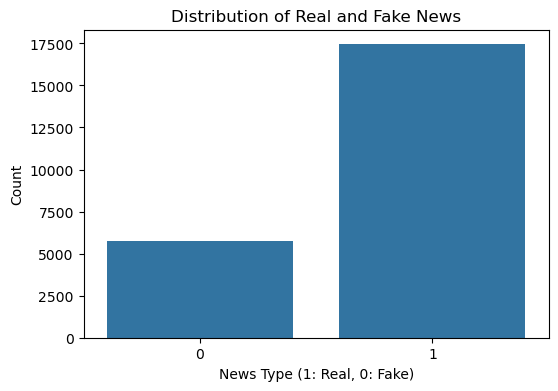

In [46]:
# 2. Distribution of Categorical Target Variable ('real')
plt.figure(figsize=(6,4))
sns.countplot(x='real', data=dataFrame)
plt.title('Distribution of Real and Fake News')
plt.xlabel('News Type (1: Real, 0: Fake)')
plt.ylabel('Count')
plt.show()

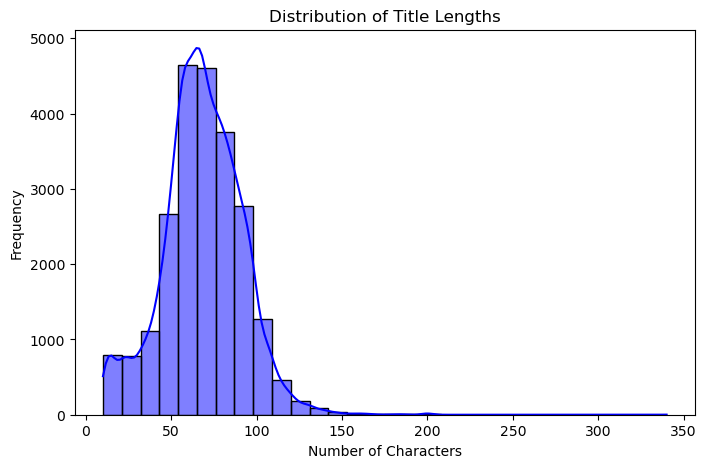

In [47]:
# 3. Distribution of Title Lengths
dataFrame['title_length'] = dataFrame['title'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8,5))
sns.histplot(dataFrame['title_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Title Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

In [48]:
# Filter out rows where title length is greater than 150 characters
#dataFrame['title'] = dataFrame['title'].apply(lambda x: len(str(x)))
#dataFrame = dataFrame[dataFrame['title_length'] <= 150]

C:\TEMP\ipykernel_7400\715189505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.values, y=top_sources.index, palette='magma')


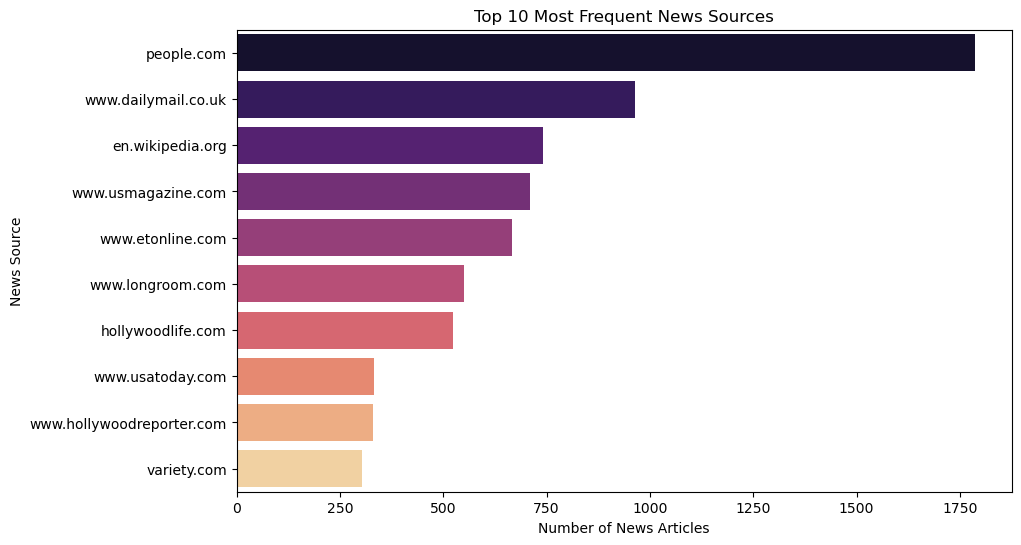

In [49]:
# 4. Most Frequent News Sources
plt.figure(figsize=(10,6))
top_sources = dataFrame['source_domain'].value_counts().head(10)
sns.barplot(x=top_sources.values, y=top_sources.index, palette='magma')
plt.title('Top 10 Most Frequent News Sources')
plt.xlabel('Number of News Articles')
plt.ylabel('News Source')
plt.show()

C:\TEMP\ipykernel_7400\197778933.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='real', y='title_length', data=dataFrame, palette='coolwarm')


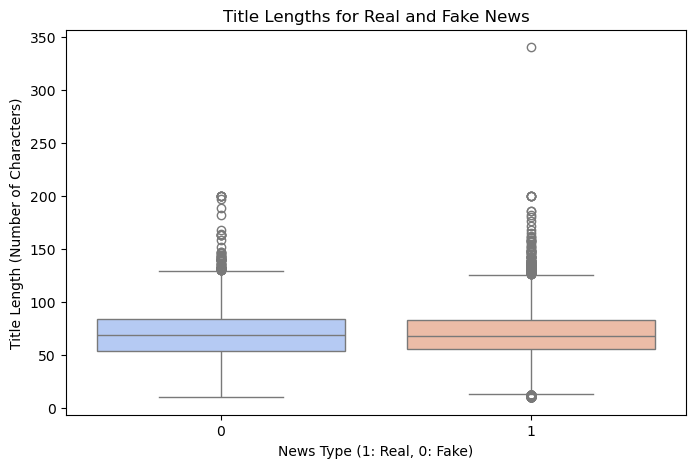

In [50]:
# 5. Comparison of Title Lengths Between Real and Fake News
plt.figure(figsize=(8,5))
sns.boxplot(x='real', y='title_length', data=dataFrame, palette='coolwarm')
plt.title('Title Lengths for Real and Fake News')
plt.xlabel('News Type (1: Real, 0: Fake)')
plt.ylabel('Title Length (Number of Characters)')
plt.show()

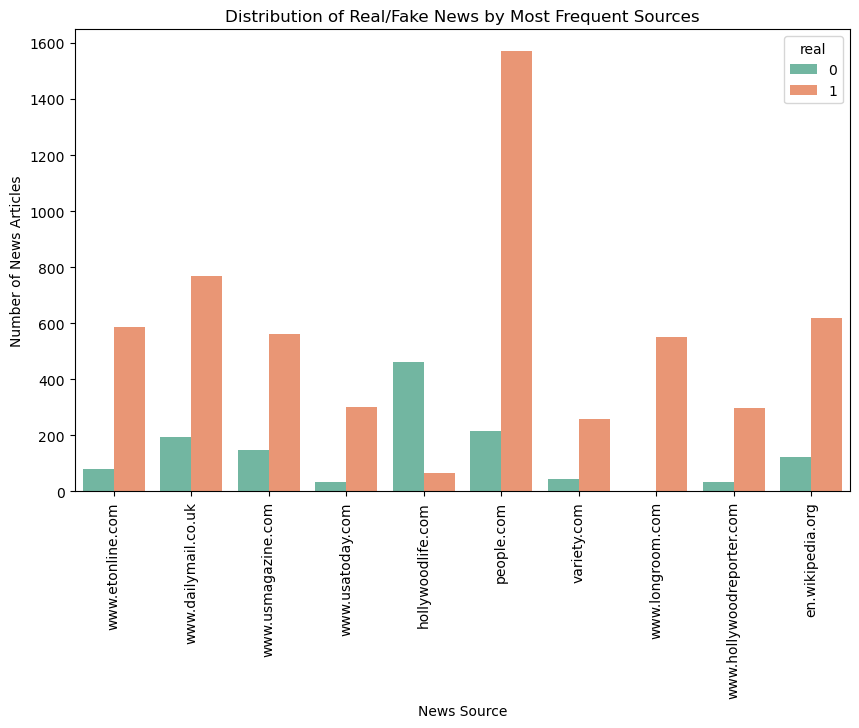

In [51]:
# 6. Distribution of Real/Fake News by Most Frequent Sources
plt.figure(figsize=(10,6))
top_5_sources = dataFrame[dataFrame['source_domain'].isin(top_sources.index)]
sns.countplot(x='source_domain', hue='real', data=top_5_sources, palette='Set2')
plt.title('Distribution of Real/Fake News by Most Frequent Sources')
plt.xlabel('News Source')
plt.ylabel('Number of News Articles')
plt.xticks(rotation=90)
plt.show()

In [52]:
dataFrame.isnull().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
title_length       0
dtype: int64

In [53]:
dataFrame = dataFrame.dropna(subset=['source_domain'])
dataFrame.isnull().sum()

title            0
news_url         0
source_domain    0
tweet_num        0
real             0
title_length     0
dtype: int64

In [54]:
dataFrame.dtypes

title            object
news_url         object
source_domain    object
tweet_num         int64
real              int64
title_length      int64
dtype: object

In [55]:
def preprocess_text(text):
    text = str(text)
    # Convert to lower case
    text = text.lower()
    # Removing URLs (if any)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove usernames (@username)
    text = re.sub(r'@\w+', '', text)
    # Removing special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    # Removing excess spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [56]:
x = dataFrame['title'].apply(str) + " " + dataFrame['source_domain'].apply(lambda x: preprocess_text(str(x)))
y = dataFrame['real']

In [57]:
print(len(x))
print(len(y))

22866
22866


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [59]:
vectorizer = TfidfVectorizer(stop_words = "english", ngram_range = (1 , 2),min_df=3, max_df=0.8)

In [60]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [61]:
model = BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

In [62]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Doğruluk Oranı: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Doğruluk Oranı:  0.8451895043731779
              precision    recall  f1-score   support

           0       0.70      0.65      0.67      1684
           1       0.89      0.91      0.90      5176

    accuracy                           0.85      6860
   macro avg       0.79      0.78      0.79      6860
weighted avg       0.84      0.85      0.84      6860



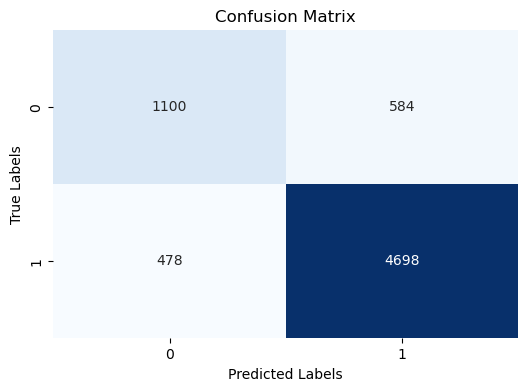

In [63]:
# Confusion matrix oluşturma
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()